In [2]:
# Importing Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = 'YOUR_CROPPED_IMAGE_PATH_HERE'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB

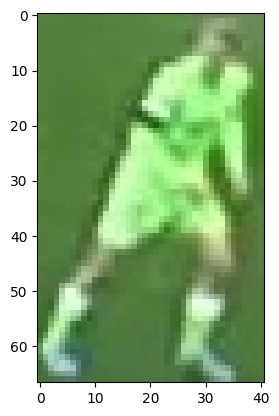

In [4]:
plt.imshow(image)
plt.show()

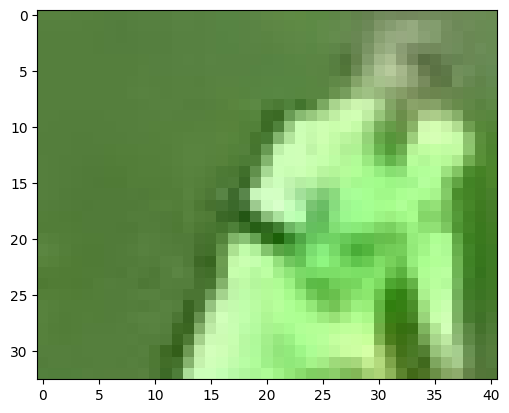

In [5]:
# Taking Top Half of the Image (Jersey is in the top half)
top_half_image =  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

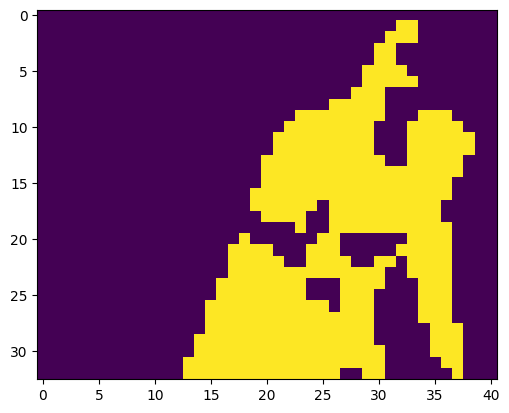

In [6]:
# Cluster the image into two clusters

# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
# Finding KMean value for background
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [10]:
# KMean value for the player
player_cluster = 1 -  non_player_cluster
print(player_cluster)

1


In [11]:
# Player Cluster Centre (Gives us the jersey color)
kmeans.cluster_centers_[player_cluster]

array([169.19201995, 234.21695761, 143.72568579])